# This file contain 3 main group of data

1. Timestamp data
2. Sensor data(52 series): All values are raw values
3. Machine status: This is target label that I want to predict when the failure will happen

In [2]:
import numpy as np
import pandas as pd

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import tensorflow


In [6]:
df=pd.read_csv("sensor.csv")


In [7]:
df.head()


,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [8]:
df.shape


(220320, 55)

In [9]:
for i in df.isnull().sum().index:
        print(df.isnull().sum()[i])

0
0
10208
369
19
19
19
19
4798
5451
5107
4595
19
19
19
19
21
220320
31
46
46
16
16
16
41
16
16
36
20
16
16
72
261
16
68
16
16
16
16
16
27
27
27
27
27
27
27
27
27
27
27
27
77017
15383
0


In [10]:
l=['Unnamed: 0']
for i in df.isnull().sum().index:
    #print (df.isnull().sum()[i], end=" ")
    if (df.isnull().sum()[i]>1000):
        l.append(i)
l

['Unnamed: 0',
 'sensor_00',
 'sensor_06',
 'sensor_07',
 'sensor_08',
 'sensor_09',
 'sensor_15',
 'sensor_50',
 'sensor_51']

In [11]:
df.drop(labels=l,axis=1,inplace=True)


In [12]:
df.columns


Index(['timestamp', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'machine_status'],
      dtype='object')

# Machine status distribution

In [13]:
df['machine_status'].value_counts()


NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

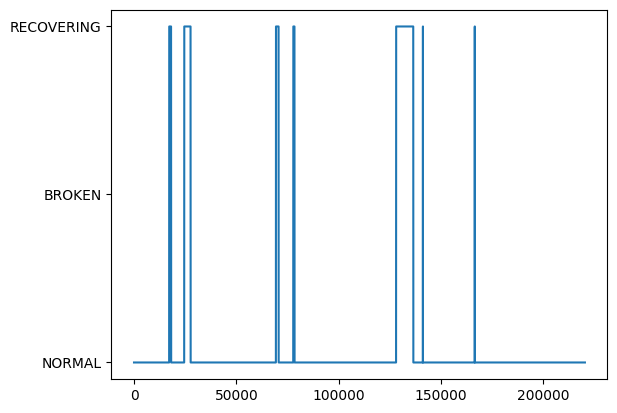

In [14]:
plt.plot(df['machine_status'])


In [15]:
m={'NORMAL':1,'RECOVERING':0.5,'BROKEN':0}
df['stat']=df['machine_status'].map(m)
df['rol']=df['stat'].rolling(2).mean()

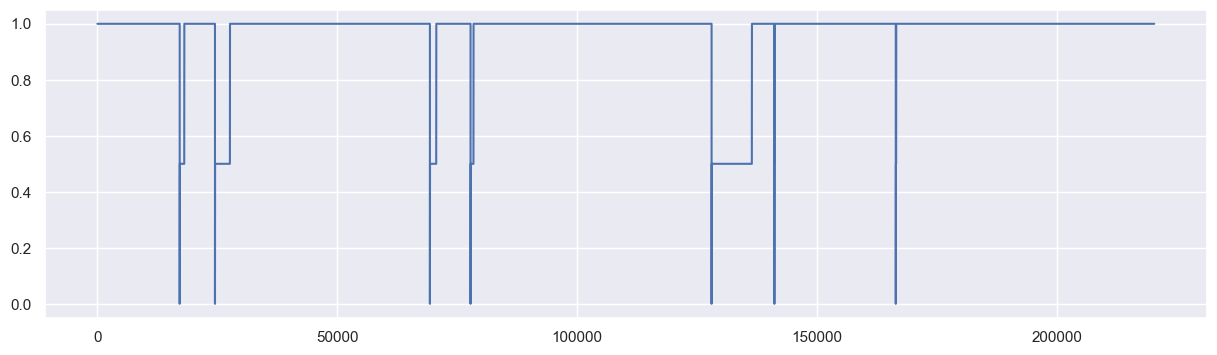

In [16]:
sns.set(rc={"figure.figsize":(15, 4)})
plt.plot(df['stat'])

Correlation to see all the relevant columns

In [17]:
co=df.corr()


<AxesSubplot: >

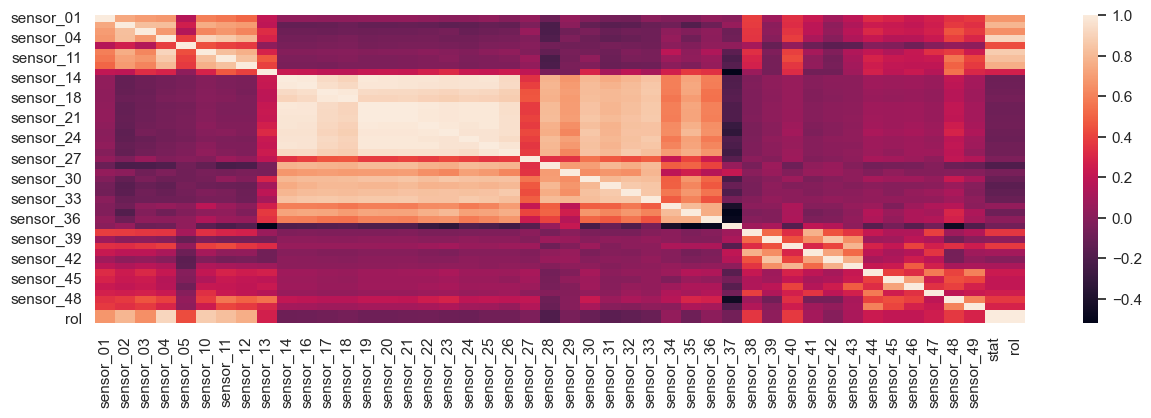

In [18]:
sns.heatmap(co)


<AxesSubplot: >

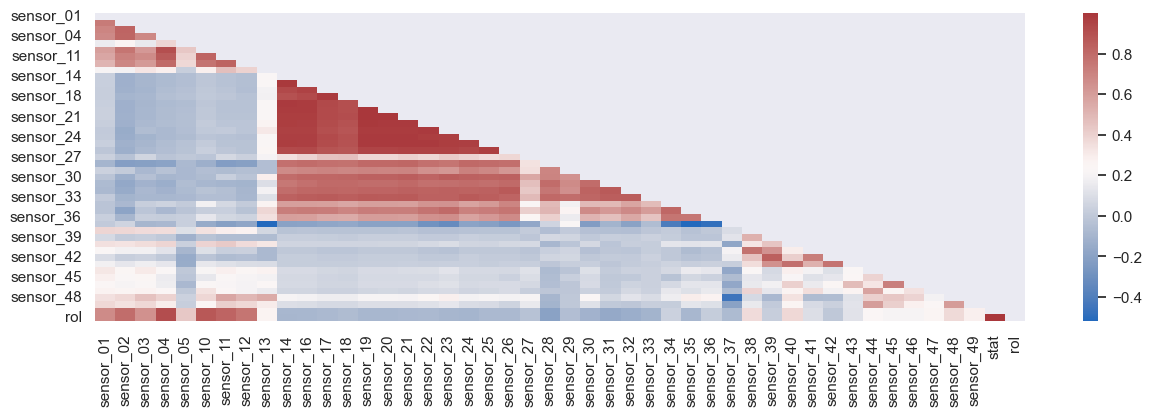

In [19]:
mask = np.triu(np.ones_like(co))
sns.heatmap(co,cmap='vlag',mask=mask)

In [20]:
co['stat']


sensor_01    0.672671
sensor_02    0.790692
sensor_03    0.645768
sensor_04    0.915775
sensor_05    0.434355
sensor_10    0.871983
sensor_11    0.822973
sensor_12    0.758324
sensor_13    0.269632
sensor_14   -0.091624
sensor_16   -0.089093
sensor_17   -0.074573
sensor_18   -0.065634
sensor_19   -0.088058
sensor_20   -0.086957
sensor_21   -0.084356
sensor_22   -0.079346
sensor_23   -0.095523
sensor_24   -0.098720
sensor_25   -0.078082
sensor_26   -0.075924
sensor_27   -0.032499
sensor_28   -0.203205
sensor_29   -0.053199
sensor_30   -0.114319
sensor_31   -0.158422
sensor_32   -0.136276
sensor_33   -0.104531
sensor_34    0.039480
sensor_35   -0.091141
sensor_36    0.019318
sensor_37   -0.067968
sensor_38    0.359798
sensor_39    0.023870
sensor_40    0.374568
sensor_41    0.103049
sensor_42   -0.007622
sensor_43    0.118121
sensor_44    0.235532
sensor_45    0.202391
sensor_46    0.202278
sensor_47    0.254635
sensor_48    0.366318
sensor_49    0.285332
stat         1.000000
rol       

In [21]:
l=[]
for i in co['stat'].index:
    if co['stat'][i]>0.75:
        print (i)
        l.append(i)


sensor_02
sensor_04
sensor_10
sensor_11
sensor_12
stat
rol


In [23]:
l

['sensor_02',
 'sensor_04',
 'sensor_10',
 'sensor_11',
 'sensor_12',
 'stat',
 'rol']

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

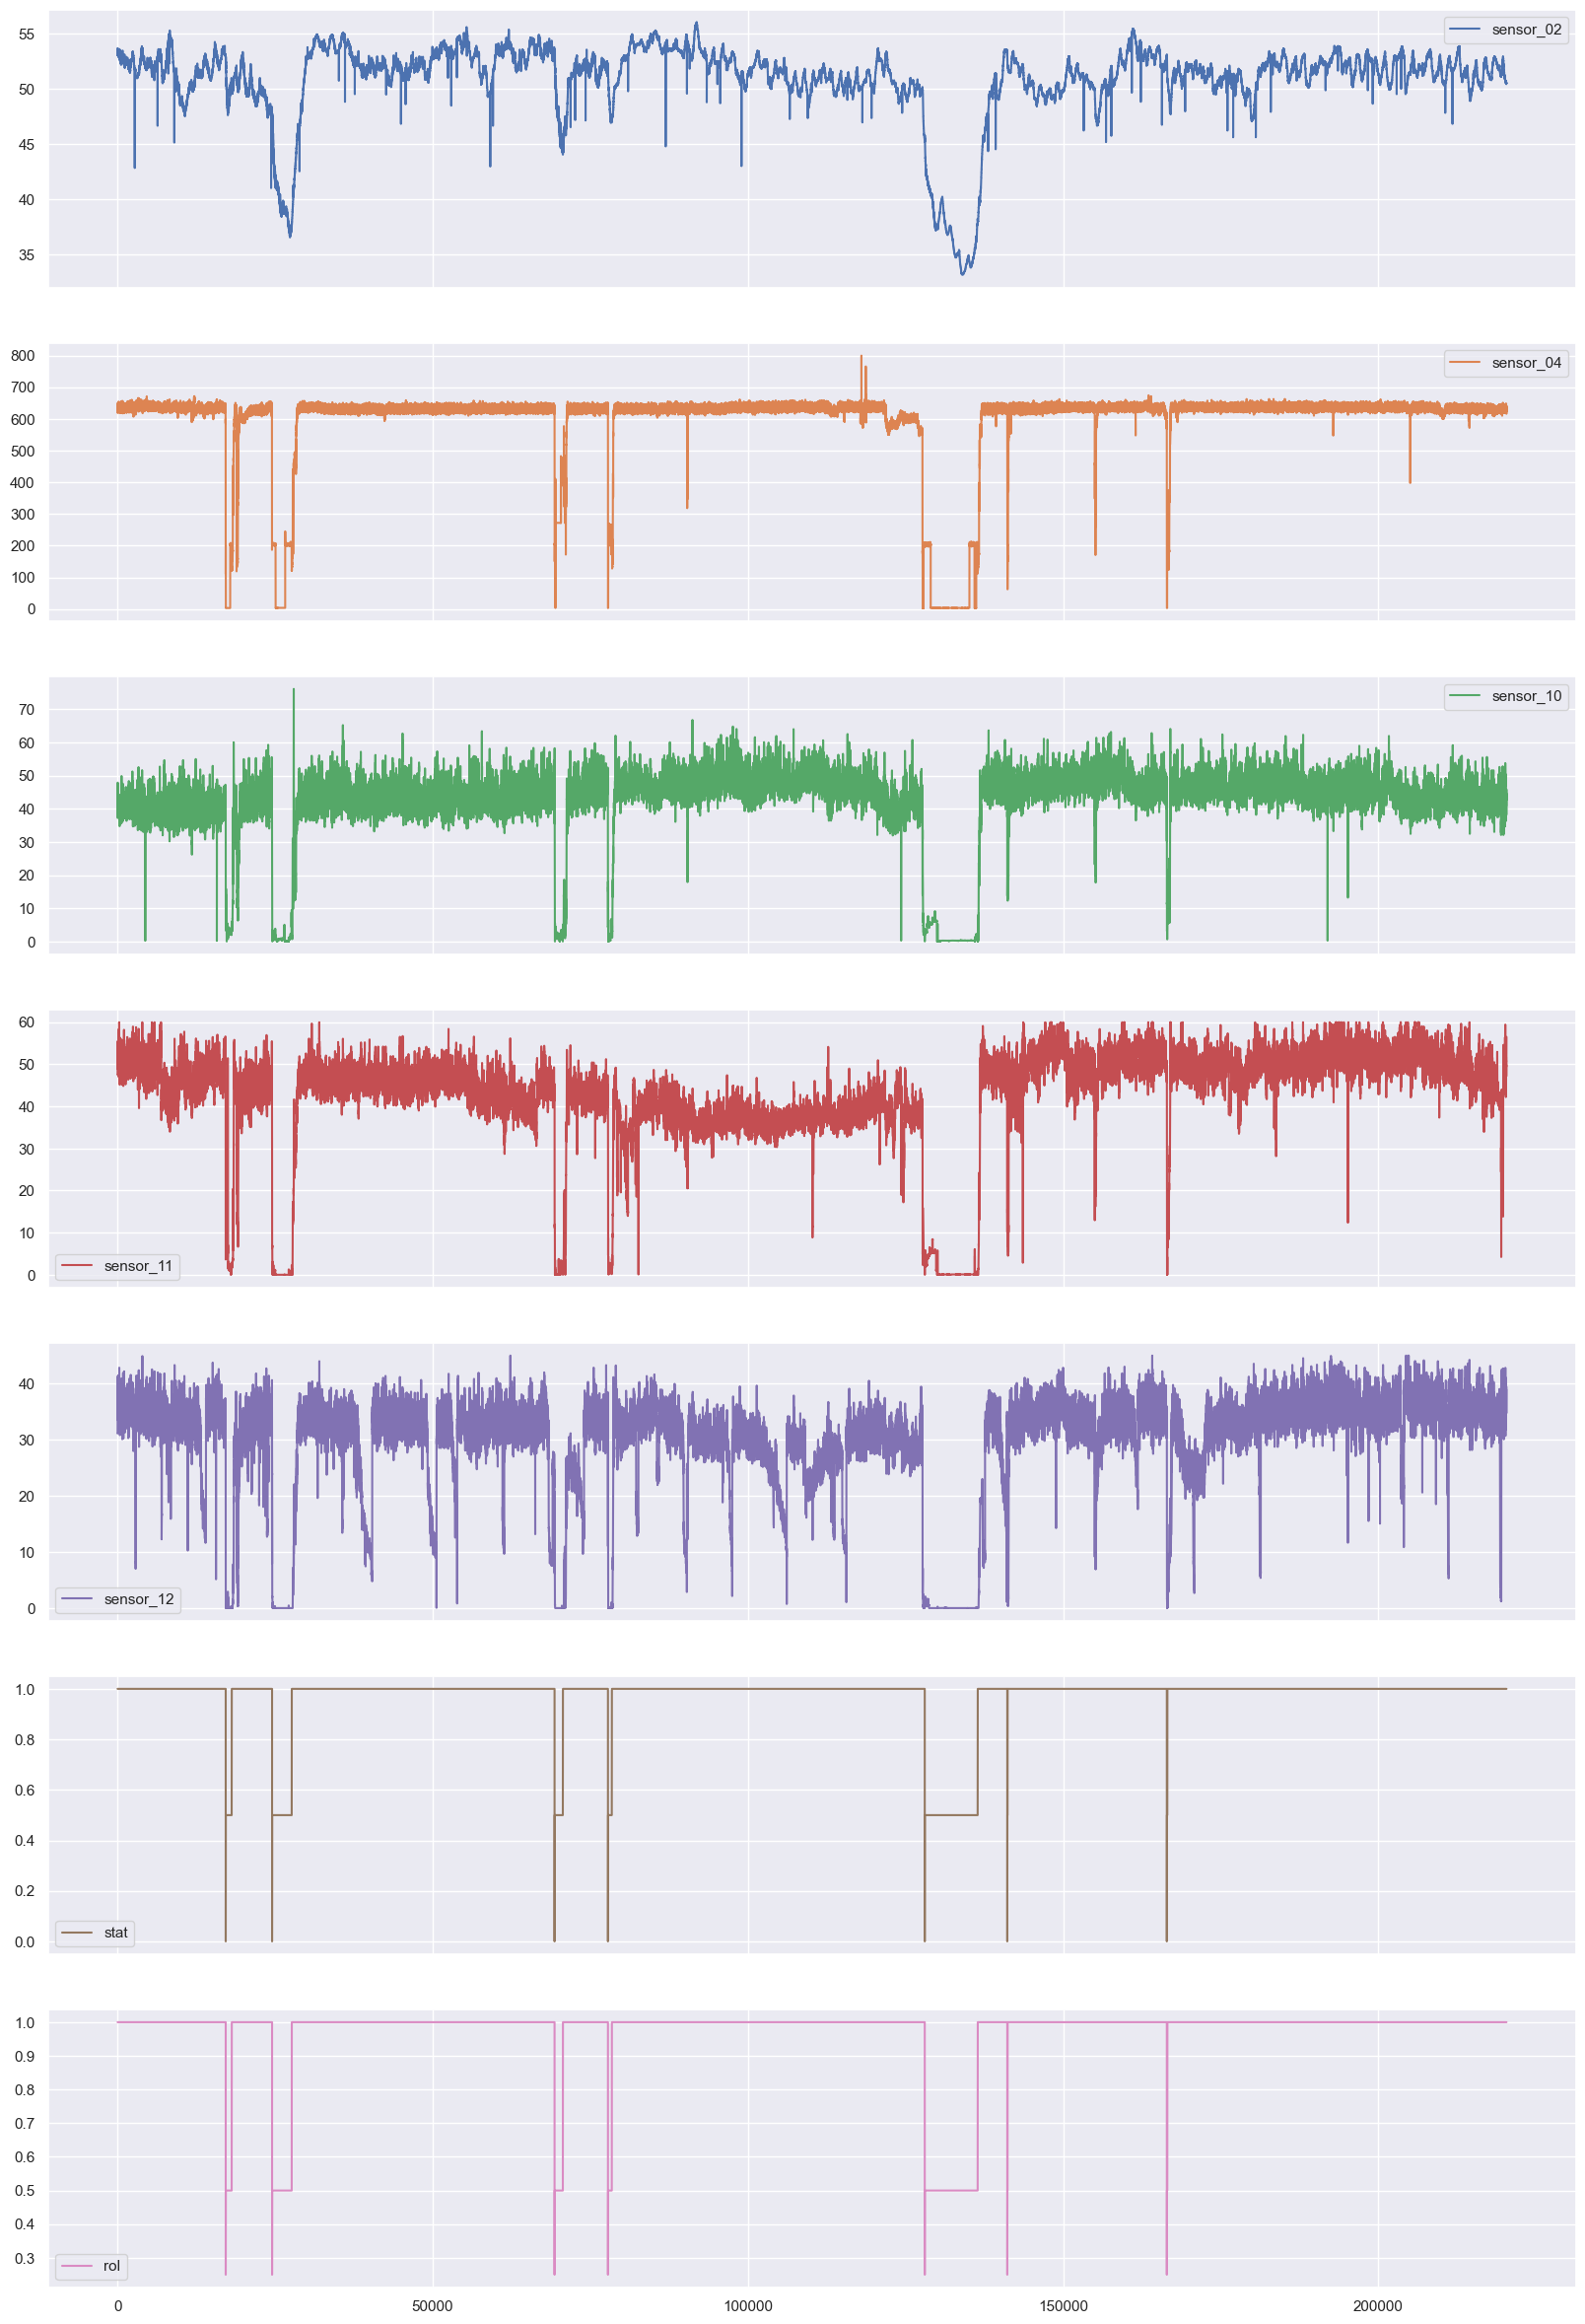

In [24]:
df[l].plot(subplots =True, sharex = True, figsize = (20,30))


In [27]:
l.pop()
l.pop()

'sensor_11'

In [28]:
l


['sensor_02', 'sensor_04', 'sensor_10']

In [30]:
df.fillna(df.mean(),inplace=True)


C:\Users\manish jha\AppData\Local\Temp\ipykernel_33856\3995769719.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace=True)


In [34]:
X=df[['sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49']]
y=df['stat']

In [35]:
X_train=X[:50000]
y_train=y[:50000]
X_test=X[50000:]
y_test=y[50000:]

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,accuracy_score

In [37]:
lr=LinearRegression()


In [38]:
lr.fit(X_train,y_train)


LinearRegression()

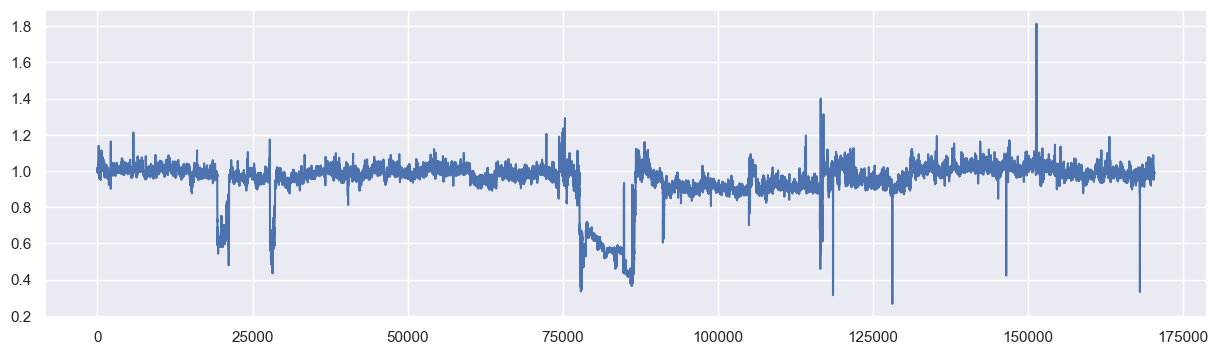

In [39]:
plt.plot(lr.predict(X_test))


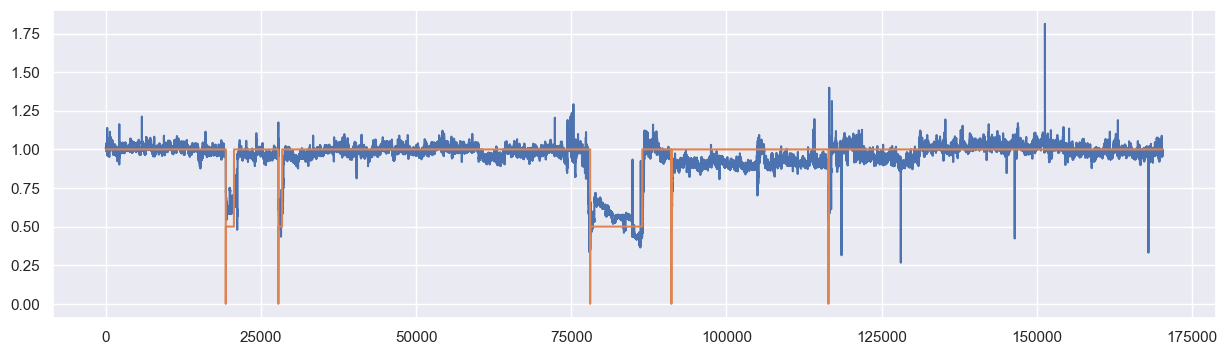

In [40]:
plt.plot(lr.predict(X_test))
plt.plot(y_test.reset_index(drop=True))

There are 4 instance where model is predicting a failure but it turns out to be inaccurate



Now we try with only variables of high coorelations



In [41]:
X=df[l]
y=df['stat']

X_train=X[:50000]
y_train=y[:50000]
X_test=X[50000:]
y_test=y[50000:]


In [42]:
X


,sensor_02,sensor_04,sensor_10
0,53.211800,634.375000,37.22740
1,53.211800,634.375000,37.22740
2,53.211800,638.888900,37.86777
3,53.168400,628.125000,38.57977
4,53.211800,636.458300,39.48939
...,...,...,...
220315,50.520830,634.722229,43.17085
220316,50.564240,630.902771,43.21038
220317,50.520830,625.925903,43.12836
220318,50.520832,635.648100,42.35746


In [43]:
lr.fit(X_train,y_train)


LinearRegression()

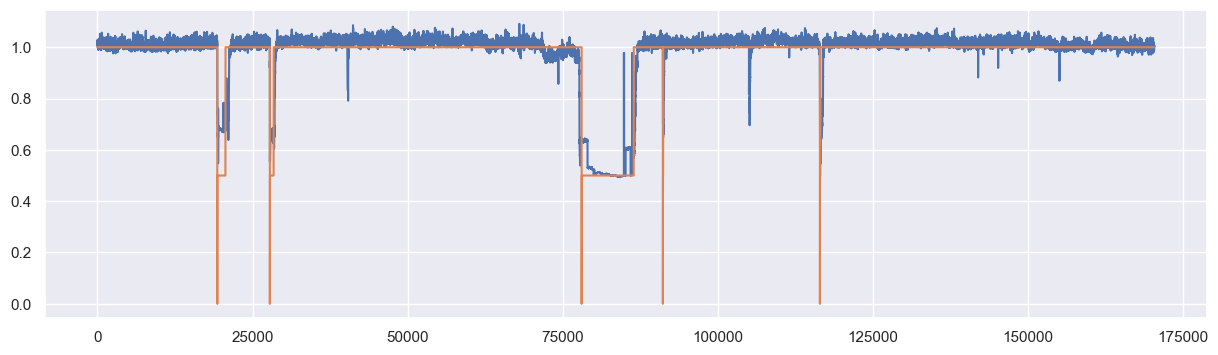

In [44]:
plt.plot(lr.predict(X_test))
plt.plot(y_test.reset_index(drop=True))

we can see that disturbance is reduced by a large extent and blue line nearly matches with the red line meeaning this turns out to be a better predicting model. Further Accuracy can be increased using Lstm from Tensorflow.

In [45]:
from sklearn.preprocessing import MinMaxScaler


In [46]:
scaler = MinMaxScaler()


In [47]:
X=df[['sensor_02', 'sensor_04', 'sensor_10', 'sensor_11', 'sensor_12', ]]
y=df['stat']

X_train=X[:50000]
y_train=y[:50000]
X_test=X[50000:]
y_test=y[50000:]

In [50]:
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [51]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,LSTM,Dropout
from tensorflow.keras.models import Sequential


In [52]:
y_train


0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
49995    1.0
49996    1.0
49997    1.0
49998    1.0
49999    1.0
Name: stat, Length: 50000, dtype: float64

In [53]:
df=df[['sensor_02', 'sensor_04', 'sensor_10', 'sensor_11', 'sensor_12','stat' ]]

In [54]:
df.fillna(df.mean(),inplace=True)

C:\Users\manish jha\AppData\Local\Temp\ipykernel_33856\2085774198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(),inplace=True)


In [55]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [56]:
X=df[['sensor_02', 'sensor_04', 'sensor_10', 'sensor_11', 'sensor_12']]
y=df['stat' ]


In [57]:
from sklearn.preprocessing import MinMaxScaler

values = X.values
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)


In [58]:
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(X.shape[1]+1, 2*X.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t)
0,0.876660,0.792242,0.489146,0.792070,0.691492,0.876660
1,0.876660,0.797904,0.497561,0.802954,0.713088,0.876660
2,0.874763,0.784402,0.506916,0.810935,0.703827,0.876660
3,0.876660,0.794855,0.518868,0.817716,0.710045,0.874763
4,0.874763,0.796307,0.516301,0.822842,0.716404,0.876660
...,...,...,...,...,...,...
220314,0.759013,0.792678,0.567240,0.902675,0.845650,0.760911
220315,0.760911,0.787887,0.567759,0.908767,0.856330,0.759013
220316,0.759013,0.781644,0.566682,0.918630,0.856151,0.760911
220317,0.759013,0.793839,0.556552,0.933220,0.864258,0.759013


In [59]:
values = reframed.values
n_train_time = 50000
X_train = values[:n_train_time]
X_test = values[n_train_time:]
y_train= y[:n_train_time]
y_test = y[n_train_time:]

In [60]:
X_train=X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test=X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [61]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

In [62]:
y_train.shape


(50000,)

In [63]:
y_test=y_test[:-1]

In [64]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [65]:
history=model.fit(X_train,y_train, epochs=50, batch_size=70, validation_data=(X_test, y_test), verbose=1, shuffle=False)

Epoch 1/50
715/715 [==============================] - 21s 21ms/step - loss: 0.0268 - val_loss: 0.0041
Epoch 2/50
715/715 [==============================] - 14s 19ms/step - loss: 0.0077 - val_loss: 0.0028
Epoch 3/50
715/715 [==============================] - 13s 19ms/step - loss: 0.0083 - val_loss: 0.0027
Epoch 4/50
715/715 [==============================] - 16s 22ms/step - loss: 0.0079 - val_loss: 0.0027
Epoch 5/50
715/715 [==============================] - 14s 20ms/step - loss: 0.0072 - val_loss: 0.0027
Epoch 6/50
715/715 [==============================] - 14s 20ms/step - loss: 0.0065 - val_loss: 0.0029
Epoch 7/50
715/715 [==============================] - 14s 19ms/step - loss: 0.0061 - val_loss: 0.0031
Epoch 8/50
715/715 [==============================] - 15s 21ms/step - loss: 0.0058 - val_loss: 0.0033
Epoch 9/50
715/715 [==============================] - 15s 21ms/step - loss: 0.0055 - val_loss: 0.0035
Epoch 10/50
715/715 [==============================] - 15s 21ms/step - loss: 0.005

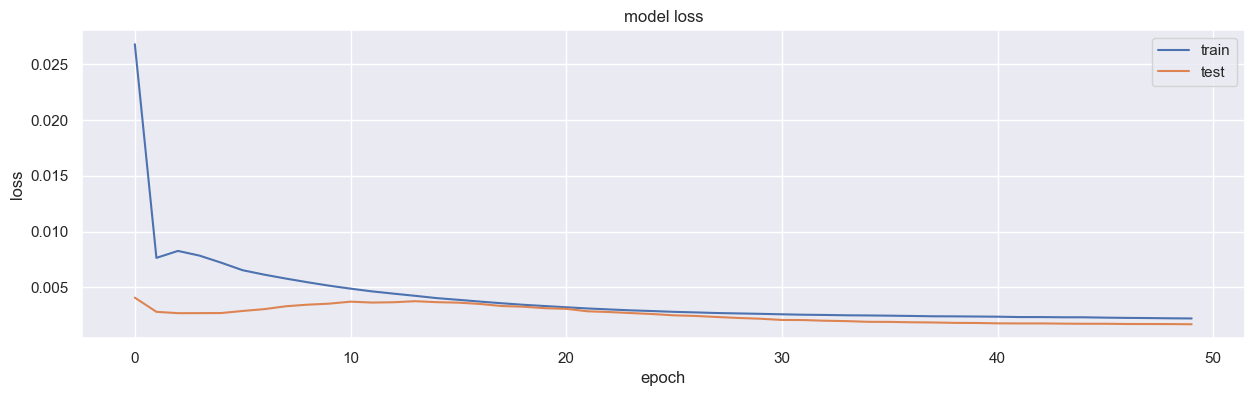

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [67]:
pre=model.predict(X_test)


5323/5323 [==============================] - 20s 4ms/step


In [68]:
from sklearn import metrics


In [69]:
metrics.mean_squared_error(pre,y_test)**0.5


0.041205906264578984

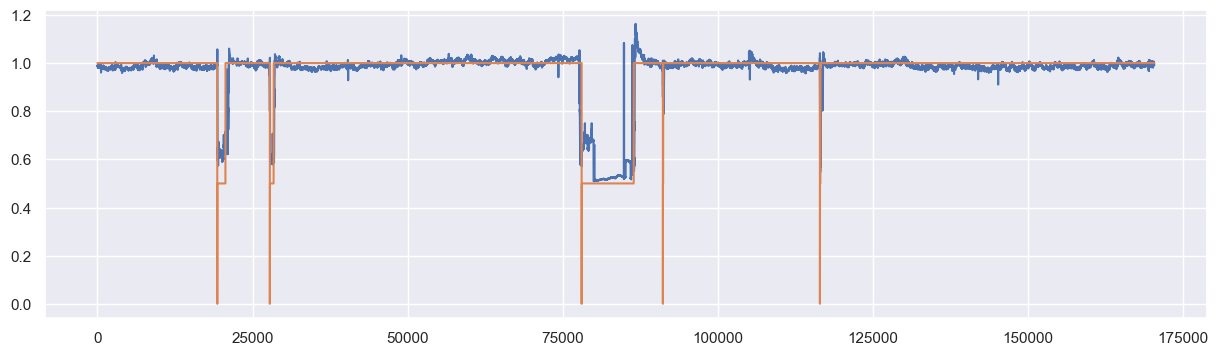

In [70]:
plt.plot(pre)
plt.plot(y_test.reset_index(drop=True))

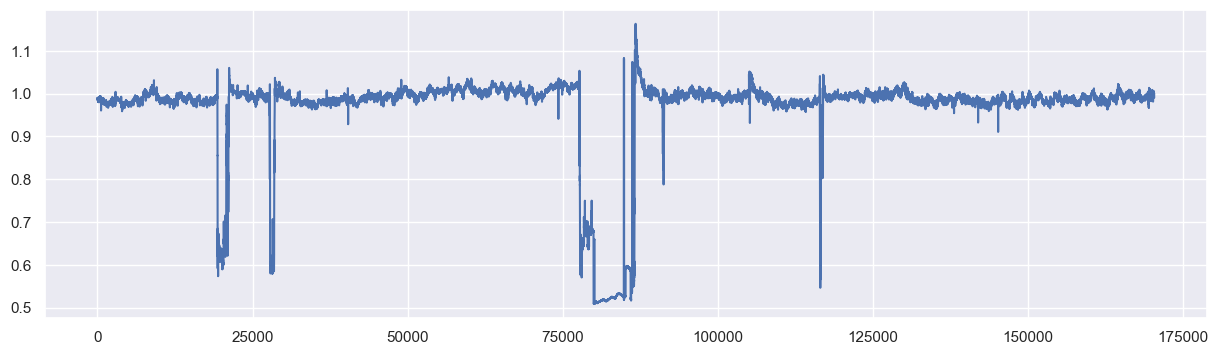

In [71]:
plt.plot(pre)


LSTM model turns out to be more accurate and best among the Three